# Principal Component Analysis

PCA is an unsupervised learning algorithm, used to find patterns in the data.

PCA tries to find new features(Components) for the data

One goal of PCA is to reduce the dimensionality of data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import mglearn

%matplotlib inline

Let's have a quick look how pca works

## Data

We're taking the same breast cancer data. We'll convert all the features into 2 features using PCA

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
# creating a dataframe of the cancer data
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


There are 30 features in the dataset, so it's not possible to visualize the data.

With the use of PCA we can transform this data into a 2-d dataset, which can be plotted

## Preprocessing

Before implemeting PCA , we need to scale the data so that each feature has a single unit variance

In [7]:
from sklearn.preprocessing import StandardScaler    # Importing the scaler function

In [8]:
scaler = StandardScaler()      # Intializing
scaler.fit(df)                 # Fitting the data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_data = scaler.transform(df)       # Transforming the data

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [10]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA (n_components=2)

In [30]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
x_pca = pca.transform(scaled_data)

In [32]:
print("Original Shape",scaled_data.shape)
print("Transformed Shape",x_pca.shape)

('Original Shape', (569L, 30L))
('Transformed Shape', (569L, 2L))


We transformed the data from 30 dimensions to 2 dimensions.

Now we can visualize the our data.

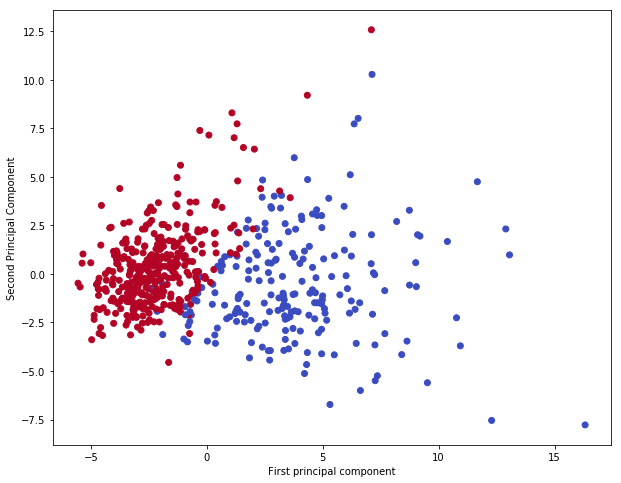

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')